## Predict error of DFT calculations <br> Publication by H. Bhatarjee, N. Anesiadis and D. Vlachos here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8277863/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Import the data - Extract X and y (y: the last column of the table)

In [2]:
X_y = pd.read_excel('data.xlsx', index_col=None, header=None)

In [3]:
X = X_y.drop([713], axis = 1)
y = X_y[713]
X.shape

(1676, 713)

### Explore the inputs X (1676 rows; 713 columns)

In [4]:
X

,0,1,2,3,4,5,6,7,8,9,...,703,704,705,706,707,708,709,710,711,712
0,0,10,0,0,13,0,0,0,0,0,...,0,0,0,0,0,9,16,0,0,0
1,2,2,0,3,0,0,0,1,1,0,...,0,0,0,0,0,5,3,4,1,0
2,0,8,0,0,10,0,0,0,0,0,...,0,0,0,0,0,8,15,0,1,0
3,6,19,0,14,22,0,8,6,8,0,...,0,0,0,0,0,22,26,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0,9,1,0,8,1,0,0,0,0,...,0,0,0,0,0,10,19,0,1,0
1672,0,4,0,0,6,0,0,0,0,0,...,0,0,0,0,0,7,12,4,0,0
1673,3,11,0,10,12,0,8,3,8,0,...,0,0,0,0,0,13,18,0,0,0
1674,1,5,0,2,3,0,2,0,1,0,...,0,0,0,0,0,7,14,0,0,0


### The input is sparse. Let's plot the sparsity pattern (spy plot: blue $\neq$ 0, white = 0)

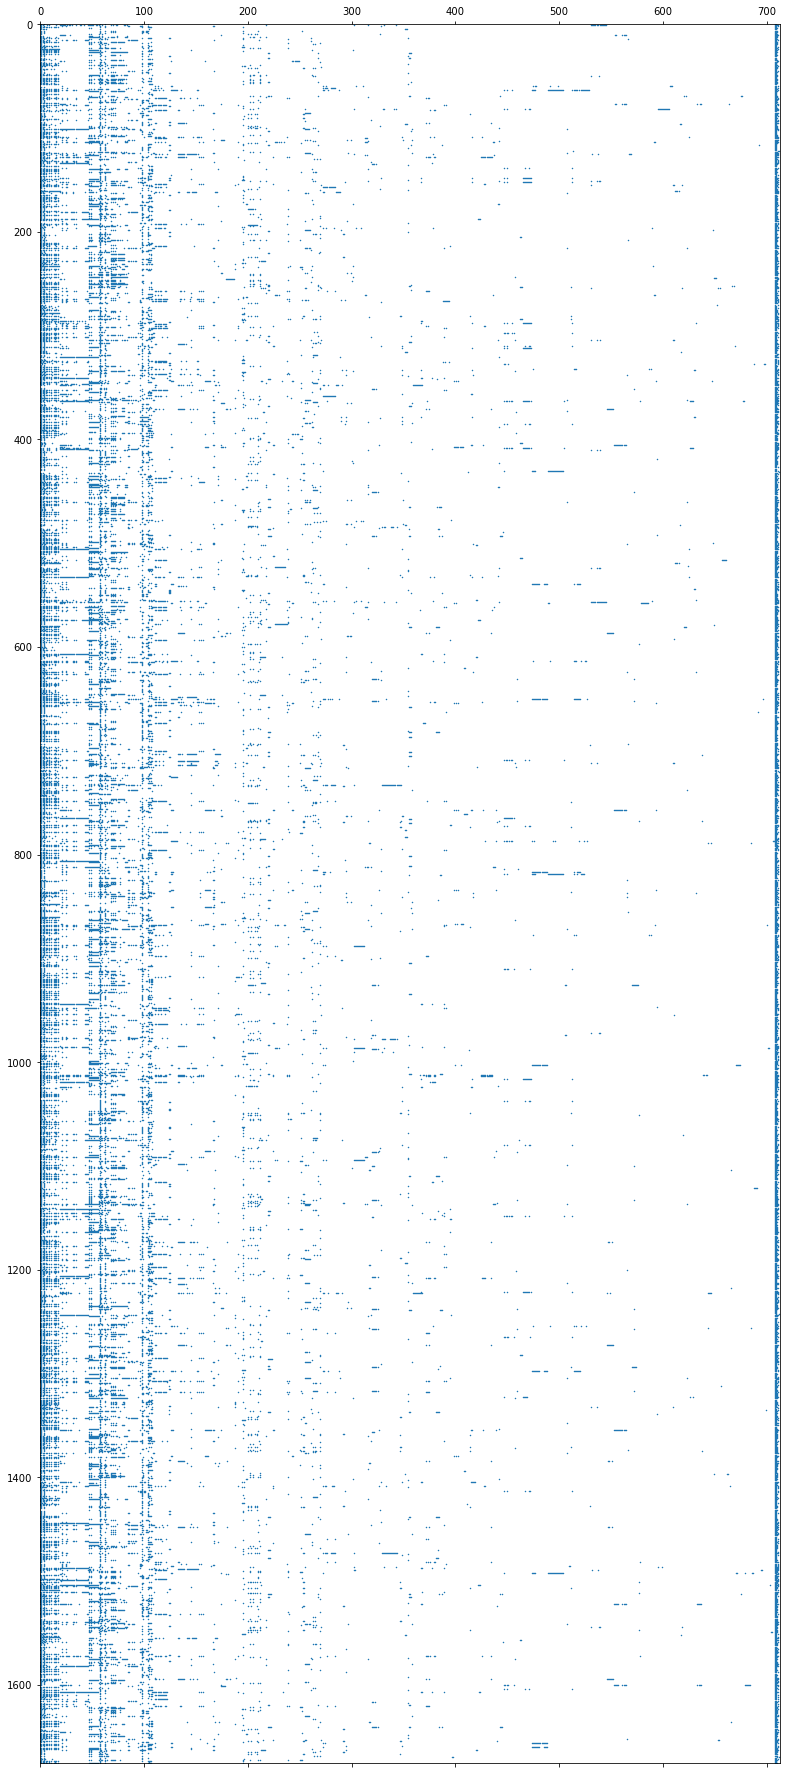

In [5]:
plt.figure(figsize=(20, 32))
plt.spy(X, precision=0, markersize=0.5)
plt.show()

### What is the percentage of non-zero elements in table X

In [6]:
print("The percentage of non-zero elements in X is: {:.2f} %".format(np.count_nonzero(X) / X.size * 100))

The percentage of non-zero elements in X is: 2.98 %


### Explore the distribution of the output error we are predicting

C:\Users\nikan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikan\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


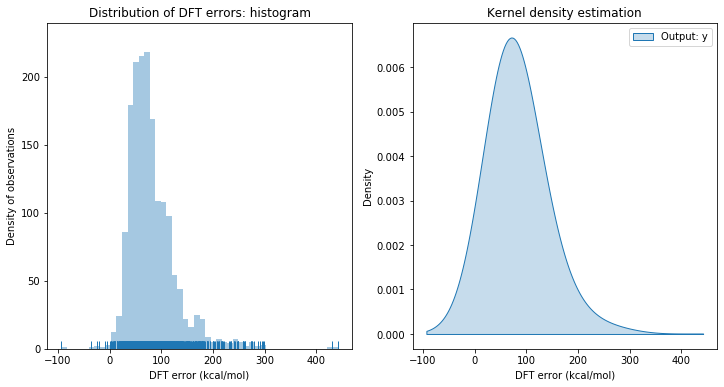

In [47]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))
# Left plot: Histogram
sns.distplot(y, kde=False, norm_hist=False, rug=True, label="Output: y", ax=axes[0])
axes[0].set_title('Distribution of DFT errors: histogram')
axes[0].set_xlabel('DFT error (kcal/mol)')
axes[0].set_ylabel('Count of observations')

# Right plot: Kernel Density Estimation
sns.kdeplot(y, shade=True, clip=(y.min(),y.max()), bw_method=1, label="Output: y", ax=axes[1])
axes[1].set_title('Kernel density estimation')
axes[1].set_xlabel('DFT error (kcal/mol)')
axes[0].set_ylabel('Density of observations')
plt.legend()
plt.show()

### Split X and y in training and test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [9]:
X_train.shape

(838, 713)

In [10]:
X_test.shape

(838, 713)

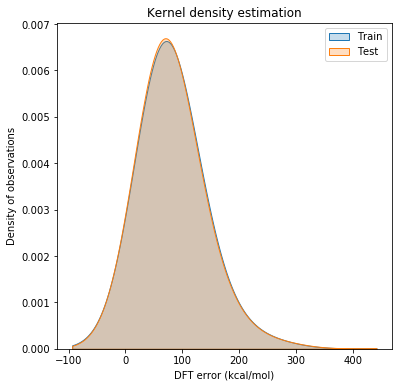

In [48]:
f, axes = plt.subplots(1, 1, figsize=(6, 6))
# Train and Test: Kernel Density Estimation
sns.kdeplot(y_train, shade=True, clip=(y.min(),y.max()), bw_method=1, label="Train")
sns.kdeplot(y_test, shade=True, clip=(y.min(),y.max()), bw_method=1, label="Test")
axes.set_title('Kernel density estimation')
axes.set_xlabel('DFT error (kcal/mol)')
axes.set_ylabel('Density of observations')
plt.legend()
plt.show()

### 1. Create a linear regression model 

In [12]:
lin_reg = linear_model.LinearRegression(normalize=False)

#### Train model with training dataset

In [13]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print regression coefficients, variance score (1 means perfect prediction)

In [14]:
# print('Coefficients: \n', lin_reg.coef_)

In [15]:
print('Variance score: {}'.format(lin_reg.score(X_test, y_test)))

Variance score: 0.5499321981388259


In [16]:
# Calculate the absolute error
lin_reg_errors = abs(lin_reg.predict(X_test) - y_test)
print('Test Set Mean Absolute Error:', round(np.mean(lin_reg_errors), 2))

Test Set Mean Absolute Error: 13.41


### 2. Create a Ridge regression model ($L_2$ regularization)

In [17]:
# Generate several possible values for the regularization strength alpha (i.e. 1/C)
# Smaller values, stronger regularization, more coefficients will go to zero
alphas = [2, 1.8, 1.6, 1.4, 1.2, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.050, 0.025, 0.010]
# You can also use: alphas = np.logspace(-2,0,10) to generate 10 logarithmically spaced points between 10^-2 and 10^0.

#### Initialize the dataframes to store for all the different values of alphas:

In [18]:
# NonZeroCoeff_L2: the number of non-zero coefficients for all alphas
# Model_Coeff_L2 : the values of all the coefficients for all alphas
Train_Error_L2 = np.zeros(shape=(len(alphas),1))
Test_Error_L2 = np.zeros(shape=(len(alphas),1))

Model_Coeff_L2  = np.zeros(shape=(X.shape[1], len(alphas)))
NonZeroCoeff_L2 = np.zeros(shape=(len(alphas),1))

#### Run the Ridge Regression for all different values of alphas (where alpha = 1/C)

In [19]:
count = -1
for alpha in alphas:
    count += 1
    # instantiate a logistic regression model, and fit with X and y
    model_L2 = linear_model.Ridge(alpha=alpha)
    # Fit the model
    model_L2.fit(X_train, y_train)
    Train_Error_L2[count,0] = np.mean(abs(model_L2.predict(X_train) - y_train))
    Test_Error_L2[count,0]  = np.mean(abs(model_L2.predict(X_test) - y_test))
    Model_Coeff_L2[:,count] = model_L2.coef_
    NonZeroCoeff_L2[count,0] = X.shape[1] - (model_L2.coef_ == 0).sum()

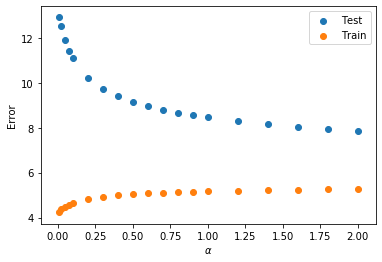

In [20]:
plt.scatter(alphas, Test_Error_L2, label='Test')
plt.scatter(alphas, Train_Error_L2, label='Train')
plt.xlabel(r'$\alpha$')
plt.ylabel('Error')
plt.legend()
plt.show()

In [21]:
NonZeroCoeff_L2

array([[620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.],
       [620.]])

In [22]:
print('Test Set Mean Absolute Error:', round(Test_Error_L2.min(),2))

Test Set Mean Absolute Error: 7.87


### Recap of Ridge Regression:
- Brought down the Test error from: 13.41 to: 7.87 (that's good!!!)
- Brought down the non-zero coefficients from 713 to 620 (that's not so good, if we want interpretation)

### 3. Create a Lasso regression model ($L_1$ regularization)

In [23]:
# Generate several possible values for the regularization strength alpha (i.e. 1/C)
# Smaller values, stronger regularization, more coefficients will go to zero
alphas = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05]

#### Initialize the dataframes to store for all the different values of alphas:

In [24]:
# NonZeroCoeff_L1: the number of non-zero coefficients for all alphas
# Model_Coeff_L1 : the values of all the coefficients for all alphas
Train_Error_L1 = np.zeros(shape=(len(alphas),1))
Test_Error_L1 = np.zeros(shape=(len(alphas),1))

Model_Coeff_L1  = np.zeros(shape=(X.shape[1], len(alphas)))
NonZeroCoeff_L1 = np.zeros(shape=(len(alphas),1))

#### Run the Lasso Regression for all different values of alphas (where alpha = 1/C)

In [25]:
count = -1
for alpha in alphas:
    count += 1
    # instantiate a logistic regression model, and fit with X and y
    model_L1 = linear_model.Lasso(alpha=alpha, max_iter=5000)
    # Fit the model
    model_L1.fit(X_train, y_train)
    Train_Error_L1[count,0] = np.mean(abs(model_L1.predict(X_train) - y_train))
    Test_Error_L1[count,0]  = np.mean(abs(model_L1.predict(X_test) - y_test))
    Model_Coeff_L1[:,count] = model_L1.coef_
    NonZeroCoeff_L1[count,0] = X.shape[1] - (model_L1.coef_ == 0).sum()

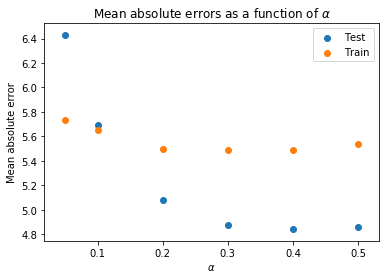

In [26]:
plt.scatter(alphas, Test_Error_L1, label='Test')
plt.scatter(alphas, Train_Error_L1, label='Train')
plt.title(r'Mean absolute errors as a function of $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean absolute error')
plt.legend()
plt.show()

In [27]:
print('Test Set Mean Absolute Error:', round(Test_Error_L1.min(),2))

Test Set Mean Absolute Error: 4.84


No handles with labels found to put in legend.


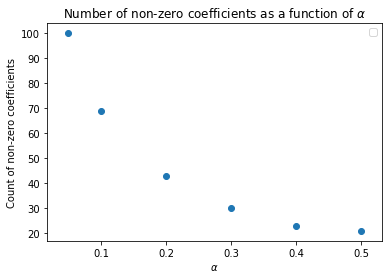

In [28]:
plt.scatter(alphas, NonZeroCoeff_L1)
plt.legend()
plt.title(r'Number of non-zero coefficients as a function of $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel('Count of non-zero coefficients')
plt.show()

In [29]:
NonZeroCoeff_L1

array([[ 21.],
       [ 23.],
       [ 30.],
       [ 43.],
       [ 69.],
       [100.]])

### Recap of Lasso Regression:
- Brought down the Test error from: 7.87 to: 4.84(that's good)
- Brought down the non-zero coefficients from 713 to 23 (that's great!!! we can use 14 columns to predict the output with much better accuracy)

### But there is a concerning issue that won't allow me to accept the Lasso solution <br> Try different random_seed values in the train_test_split. The results will surprise you. Not very stable

### What can we do to avoid the sensitivity to the 50-50\% split in the train_test_split? <br> Use [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), specifically [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) <br> ![image](CV.png)

In [30]:
# Just setting cv=5 will NOT shuffle your data by default
from sklearn.model_selection import KFold
splitter = KFold(5, random_state=42, shuffle=True)

# instantiate a logistic regression model, and fit with X and y
alphas = np.logspace(-1, 0, 50)
model_LassoCV = linear_model.LassoCV(alphas=alphas, cv=splitter, max_iter=10000) # n_alphas=100, default alternative is irrelevant
# Fit the model
model_LassoCV.fit(X_train, y_train)

LassoCV(alphas=array([0.1       , 0.10481131, 0.10985411, 0.11513954, 0.12067926,
       0.12648552, 0.13257114, 0.13894955, 0.14563485, 0.1526418 ,
       0.15998587, 0.16768329, 0.17575106, 0.184207  , 0.19306977,
       0.20235896, 0.21209509, 0.22229965, 0.23299518, 0.24420531,
       0.25595479, 0.26826958, 0.28117687, 0.29470517, 0.30888436,
       0.32374575, 0.33932218, 0.35564803, 0.37275937, 0.39069399,
       0.409491...
       0.51794747, 0.54286754, 0.5689866 , 0.59636233, 0.62505519,
       0.65512856, 0.68664885, 0.71968567, 0.75431201, 0.79060432,
       0.82864277, 0.86851137, 0.91029818, 0.95409548, 1.        ]),
        copy_X=True, cv=KFold(n_splits=5, random_state=42, shuffle=True),
        eps=0.001, fit_intercept=True, max_iter=10000, n_alphas=100,
        n_jobs=None, normalize=False, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [31]:
model_LassoCV.alpha_

0.49417133613238345

In [32]:
X.shape[1] - (model_LassoCV.coef_ == 0).sum()

22

In [33]:
model_LassoCV.alphas_

array([1.        , 0.95409548, 0.91029818, 0.86851137, 0.82864277,
       0.79060432, 0.75431201, 0.71968567, 0.68664885, 0.65512856,
       0.62505519, 0.59636233, 0.5689866 , 0.54286754, 0.51794747,
       0.49417134, 0.47148664, 0.44984327, 0.42919343, 0.40949151,
       0.39069399, 0.37275937, 0.35564803, 0.33932218, 0.32374575,
       0.30888436, 0.29470517, 0.28117687, 0.26826958, 0.25595479,
       0.24420531, 0.23299518, 0.22229965, 0.21209509, 0.20235896,
       0.19306977, 0.184207  , 0.17575106, 0.16768329, 0.15998587,
       0.1526418 , 0.14563485, 0.13894955, 0.13257114, 0.12648552,
       0.12067926, 0.11513954, 0.10985411, 0.10481131, 0.1       ])

In [34]:
np.mean(abs(model_LassoCV.predict(X_train) - y_train))

5.5388361761966225

In [35]:
np.mean(abs(model_LassoCV.predict(X_test) - y_test))

4.856494981414217

### Still the same Test error (5.79 compared to 5.78), but more robust since we did a Cross-validation of 5

In [36]:
model_LassoCV.coef_

array([-0.00000000e+00,  3.15720161e-01, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.50861526e-01,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  5.17274964e+00,
        0.00000000e+00,  1.51915076e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.24975654e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.16462774e-01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [37]:
error = model_LassoCV.predict(X_test) - y_test

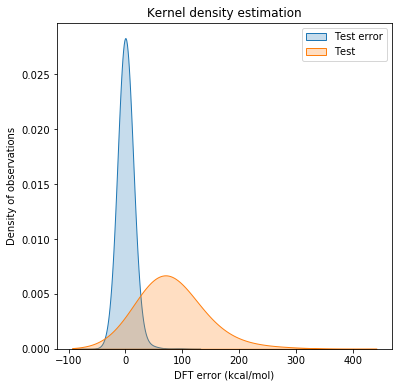

In [49]:
f, axes = plt.subplots(1, 1, figsize=(6, 6))
# Train and Test: Kernel Density Estimation
sns.kdeplot(error, shade=True, clip=(y.min(),y.max()), bw_method=1, label="Test error")
sns.kdeplot(y_test, shade=True, clip=(y.min(),y.max()), bw_method=1, label="Test")
axes.set_title('Kernel density estimation')
axes.set_xlabel('DFT error (kcal/mol)')
axes.set_ylabel('Density of observations')
plt.legend()
plt.show()

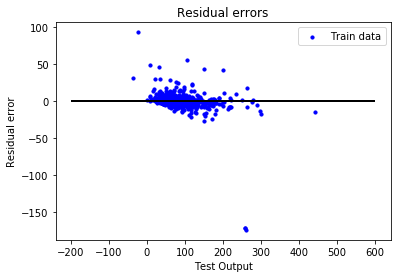

In [39]:
plt.scatter(y_test, error, color = 'blue', s = 10, label = 'Train data')
plt.hlines(y=0, xmin=-200, xmax=600, linewidth=2)
plt.xlabel('Test Output')
plt.ylabel('Residual error')
plt.legend(loc = 'upper right')
plt.title('Residual errors')
plt.show()

Text(27.0, 0.5, 'Residual error')

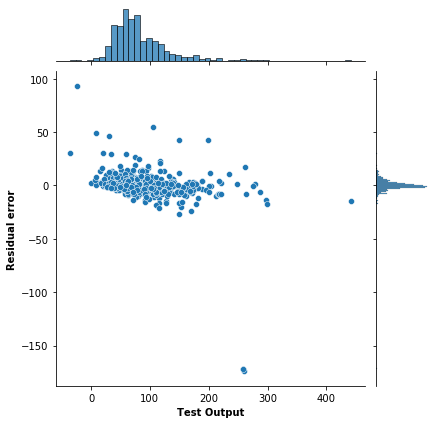

In [40]:
h= sns.jointplot(x=y_test, y=error, kind="scatter");
h.ax_joint.set_xlabel('Test Output', fontweight='bold')
h.ax_joint.set_ylabel('Residual error', fontweight='bold')

### [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet): the ObjFun is now a combination of Lasso and Ridge regression <br> L1_ratio of Lasso + (1-L1_ratio) Ridge